# Phase 2 Milestone 1

# 1. Perkenalan

Nama : Aditya Vianseto<br>
Batch : FTDS-011<br>
Dataset : Telco Customer Churn<br>
Objective : Analysis About Characteristic of Churn Customer and Create Neural Network Model To Predict About Churn Customer

URL Deployment Heroku :<br>
https://ftds-11-p2m1-aditya-vianseto.herokuapp.com/

# 2. Import Libraries

In [1163]:
# Import Libraries

import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder

Melakukan Import Library yang akan digunakan pada penelitian ini

# 3. Data Loading

In [1164]:
# Load Dataset
raw_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

Melakukan load dataset dari file `Wholesale customers data.csv` dan memasukannya kedalam variabel `raw_data`

In [1165]:
# Display All Columns of Data Frame Without Limitation
pd.set_option('max_columns', None)

# Display First Row of Dataset
print('============================= First Rows of Dataset =============================')
display(raw_data.head())

# Display Las Row of Dataset
print('\n\n=============================== Last Rows of Dataset ===============================')
display(raw_data.tail())

============================= First Rows of Dataset =============================


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes




=============================== Last Rows of Dataset ===============================


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


Menampilkan data teratas dan terbawah dari dataset yang digunakan

In [1166]:
# Check Dataset Info
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Berdasarkan info diatas dari dataset yang digunakan dapat diketahui bahwa:
- Terdapat `7043` entri data customer dan terdapat `21` kolom
- Tidak ada `Missing Values`
- `Data Type` pada kolom sudah `TotalCharges` tidak sesuai, dimana seharusnya memiliki `Data Type` berupa `float64` karena merupakan kolom yang menjelaskan tentang nominal total tagihan dari seorang customer

In [1167]:
# Check Values with Empty String on TotalCharges
raw_data[raw_data.TotalCharges==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Terjadi kegagalan dalam percobaan merubah `Data Type` pada `TotalCharges` dari `object` menjadi `float64` dikarenakan terdapat missing values berupa string kosong pada kolom TotalCharges, dikarenakan hanya berjumlah `11` maka diputuskan untuk menghapus data dengan string kosong tersebut agar dapat melihat deskripsi dari kolom `TotalCharges`

In [1168]:
# Duplicate Data Before do Any Change on Dataset
backup_data = raw_data.copy()

# Drop Data With Empty String on TotalCharges
raw_data.drop(raw_data[raw_data.TotalCharges==' '].index, inplace=True)

In [1169]:
# Change TotalCharges DataType into float64
raw_data.TotalCharges = raw_data.TotalCharges.astype(np.float64)

# Drop customerID
raw_data.drop(columns='customerID', inplace=True)

Berhasil melakukan perubahan `Data Type` pada `TotalCharges` menjadi `float64` dan melakukan drop kolom `customerID` karena tidak diperlukan

In [1170]:
# Describe Dataset

raw_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Berdasarkan hasil diatas dapat diketahui bahwa rata-rata waktu customer stay pada penyedia layanan tersebut adalah selama `32` bulan atau `2` tahun lebih `1` bulan, berdasarkan hal ini dapat diasumsikan bahwa customer `churn rate` cukup rendah karena rata-rata dari keseluruhan customer cukup loyal untuk waktu yang lama

# 4.Exploratory Data Analysis (EDA)

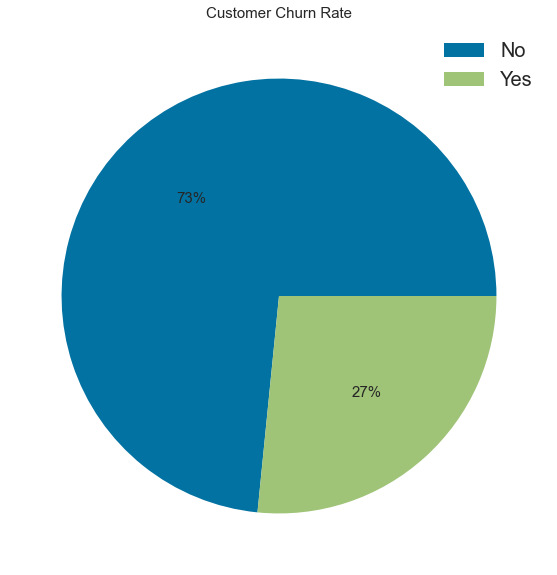

In [1171]:
# Check Customer Churn Rate
raw_data.Churn.value_counts().plot(kind='pie', labels=['',''], autopct='%.0f%%', figsize=[10,10], fontsize=15, )
plt.title('Customer Churn Rate', fontsize=15)
plt.ylabel('')
plt.legend(labels=['No','Yes'], fontsize=20, loc='best')
plt.show()

Berdasarkan hasil diagram diatas dapat diketahui bahwa customer cenderung loyal, karena memiliki `churn rate` yang terbilang cukup rendah, namun dapat dikatakan bahwa terdapat ketidak seimbangan jumlah data antara customer yang `churn` dan `tidak` dimana hal ini dapat mempengaruhi hasil prediksi

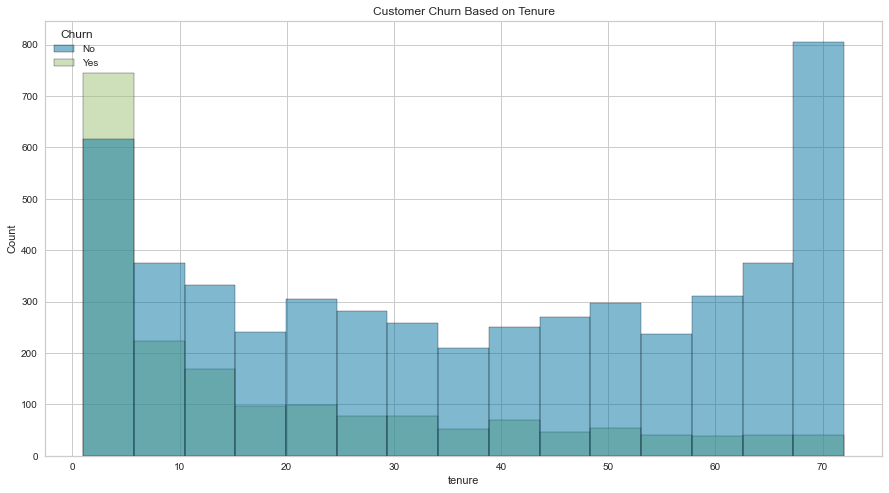

Fastest Tenure of Customer is 1 month


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


Longest Tenure of Customer is 72 month


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
28,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,6369.45,No


In [1172]:
# Check Customer Churn Based on Their Tenure
plt.figure(figsize=(15,8))
sns.histplot(data = raw_data, x = 'tenure', hue = 'Churn', legend = True)
plt.title('Customer Churn Based on Tenure')
plt.show()
print(f'Fastest Tenure of Customer is {raw_data.tenure.min()} month')
display(raw_data[raw_data.index==raw_data.tenure.idxmin()])
print(f'Longest Tenure of Customer is {raw_data.tenure.max()} month')
display(raw_data[raw_data.index==raw_data.tenure.idxmax()])

Berdasarkan hasil diatas dapat disimpulkan bahwa dengan semakin lama `tenure` maka semakin menurun juga tingkat `churn` seorang customer, customer `churn` terbanyak terdapat pada customer yang baru berlangganan dibawah setengah tahun. Tenure tercepat seorang customer adalah 1 bulan dimana besar kemungkinan bahwa customer tersebut baru saja berlangganan, sedangkan tenure terlama seorang customer adalah `72` bulan

Terdapat informasi menarik dari customer yang telah berlangganan selama 72 bulan, dimana customer tersebut sudah menikah namun hanya tinggal berdua saja dan customer tersebut berlangganan pada seluruh fasilitas tambahan yang ada dengan pembayaran melalui credit card secara otomatis, sehingga dapat diasumsikan bahwa customer tersebut merupakan seorang dengan penghasilan yang cukup tinggi

Customer Churn Based on Service Given


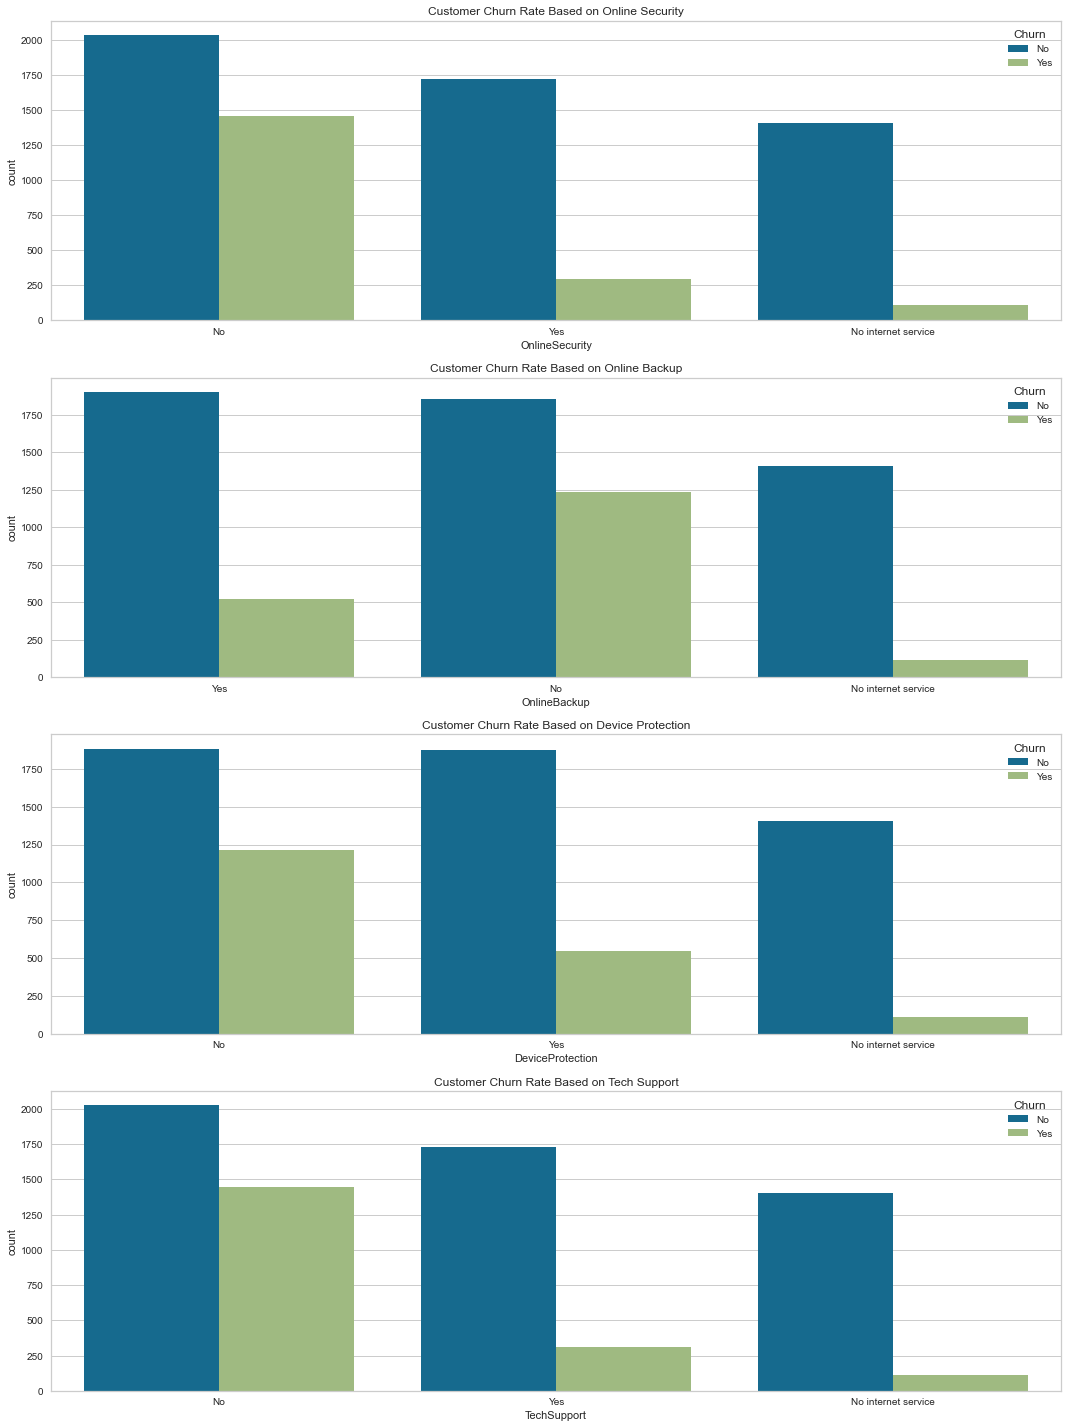

In [1173]:
# Check Customer Churn Based on Services
print('Customer Churn Based on Service Given')
fig1, ax1 = plt.subplots(figsize=[15,20], nrows=4)
sns.countplot(x="OnlineSecurity", hue="Churn", data=raw_data, ax=ax1[0])
ax1[0].set_title('Customer Churn Rate Based on Online Security')
sns.countplot(x="OnlineBackup", hue="Churn", data=raw_data, ax=ax1[1])
ax1[1].set_title('Customer Churn Rate Based on Online Backup')
sns.countplot(x="DeviceProtection", hue="Churn", data=raw_data, ax=ax1[2])
ax1[2].set_title('Customer Churn Rate Based on Device Protection')
sns.countplot(x="TechSupport", hue="Churn", data=raw_data, ax=ax1[3])
ax1[3].set_title('Customer Churn Rate Based on Tech Support')
fig1.tight_layout()
plt.show()

Berdasarkan hasil diatas dapat disimpulkan bahwa customer akan cenderung churn ketika memilih untuk tidak berlangganan dalam beberapa fasilitas tambahan yang diberikan seperti `Online Security`, `Online Backup`, `Device Protection`, dan `Tech Support`. Dapat diasumsikan bahwa terdapat biaya tambahan apabila customer ingin berlangganan pada fasilitas tambahan sehingga beberapa customer akan churn karena perlu biaya yang lebih banyak apabila ingin mendapatkan fasilitas tersebut dan mungkin penyedia jasa layanan lainnya tidak memberlakukan biaya tambahan apabila customer ingin menikmati fasilitas tersebut.

Customer Churn Based on Demographics


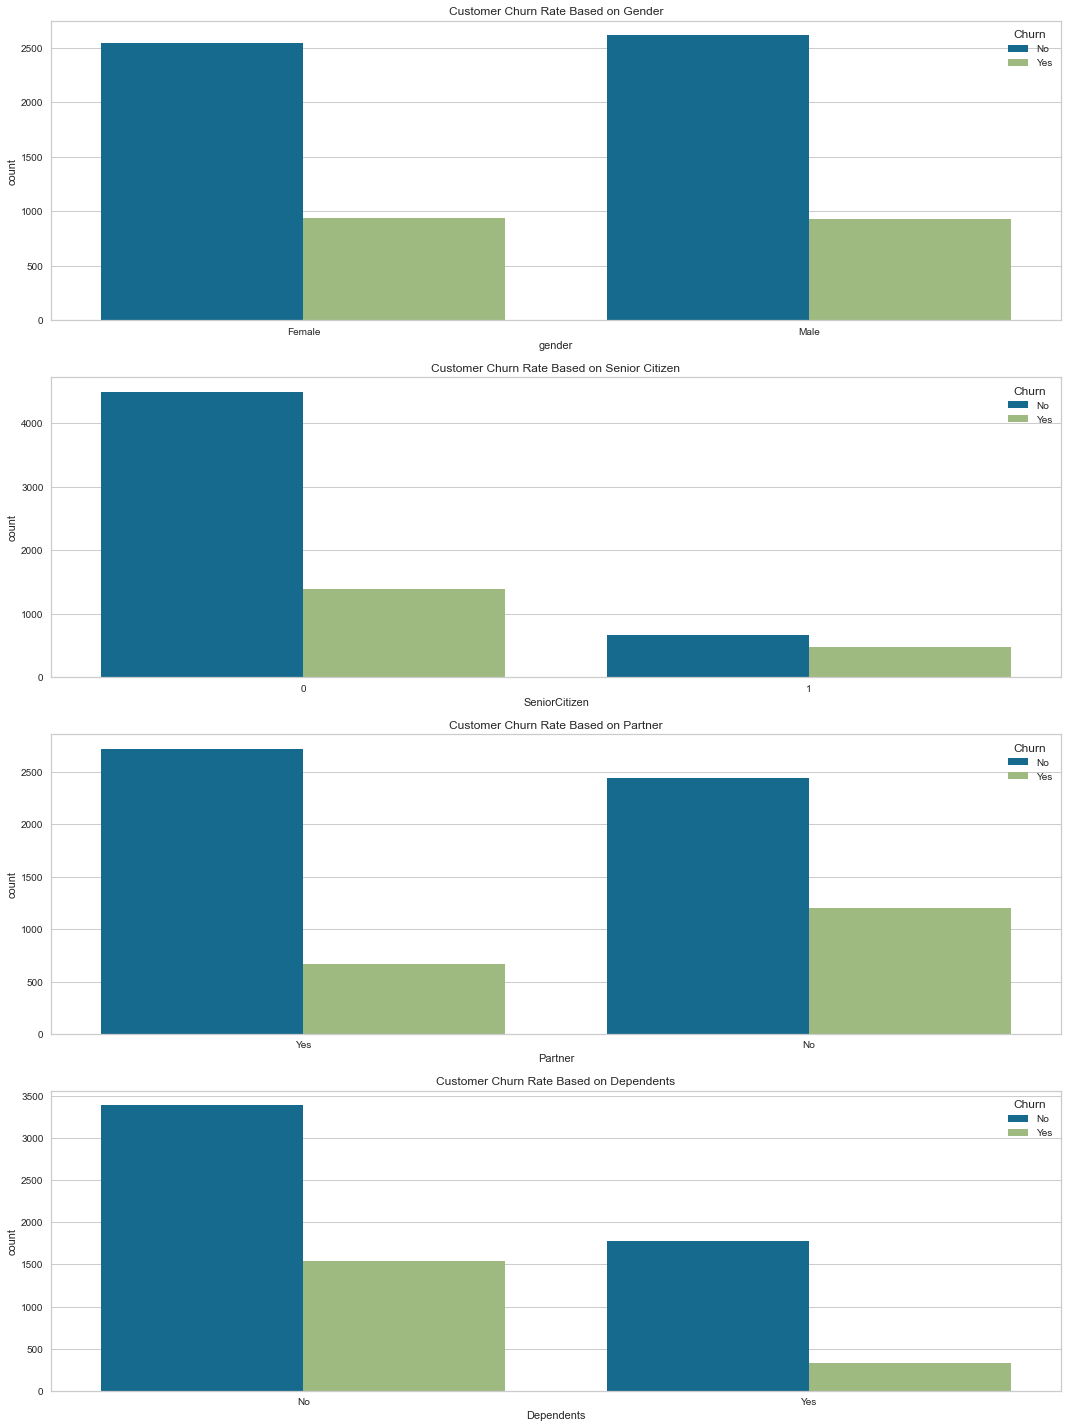

In [1174]:
# Check Customer Churn Based on Demographics
print('Customer Churn Based on Demographics')
fig2, ax2 = plt.subplots(figsize=[15,20], nrows=4)
sns.countplot(x="gender", hue="Churn", data=raw_data, ax=ax2[0])
ax2[0].set_title('Customer Churn Rate Based on Gender')
sns.countplot(x="SeniorCitizen", hue="Churn", data=raw_data, ax=ax2[1])
ax2[1].set_title('Customer Churn Rate Based on Senior Citizen')
sns.countplot(x="Partner", hue="Churn", data=raw_data, ax=ax2[2])
ax2[2].set_title('Customer Churn Rate Based on Partner')
sns.countplot(x="Dependents", hue="Churn", data=raw_data, ax=ax2[3])
ax2[3].set_title('Customer Churn Rate Based on Dependents')
fig2.tight_layout()
plt.show()

Berdasarkan hasil diatas dapat disimpulkan bahwa demografi seorang customer tidak terlalu mempengaruhi churn rate

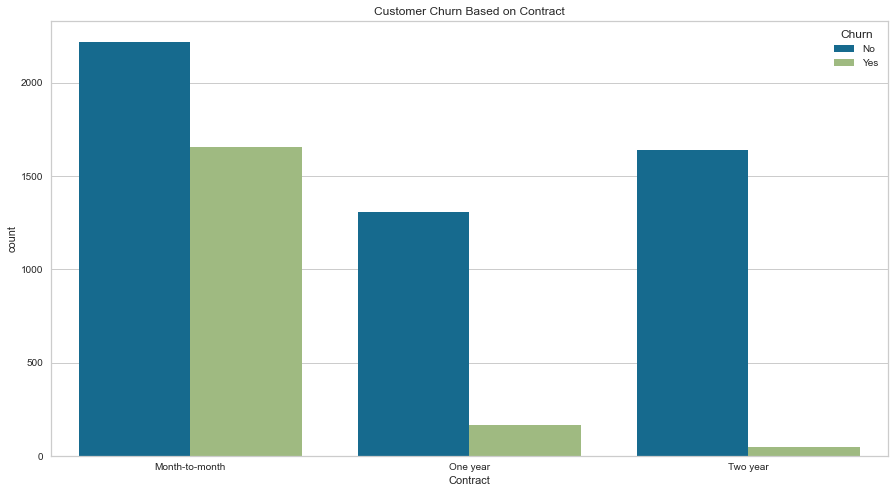

In [1175]:
# Check Customer Churn Based on Contract
plt.figure(figsize=(15,8))
sns.countplot(x="Contract", hue="Churn", data=raw_data)
plt.title('Customer Churn Based on Contract')
plt.show()

Berdasarkan hasil diatas dapat disimpulkan bahwa customer cenderung `churn` ketika baru berlangganan dalam beberapa bulan

In [1176]:
raw_data.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

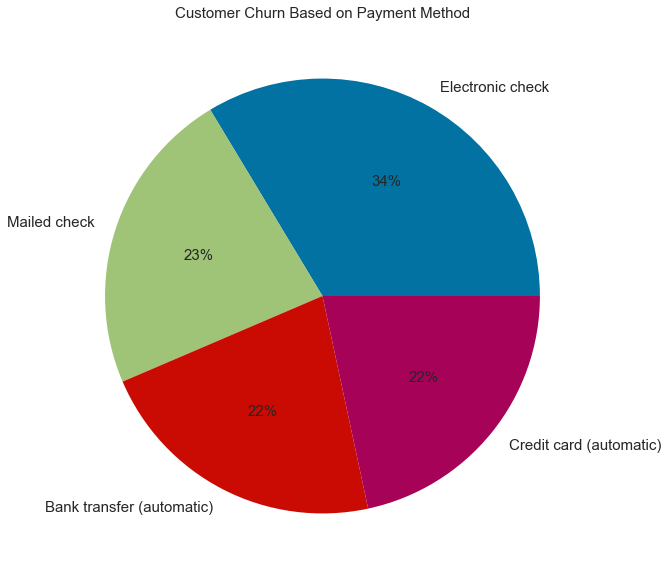

In [1177]:
# Count Customer Based in Payment Method
raw_data.PaymentMethod.value_counts().plot(kind='pie', autopct='%.0f%%', figsize=[10,10], fontsize=15, )
plt.title('Customer Churn Based on Payment Method', fontsize=15)
plt.ylabel('')
plt.show()

Berdasarkan hasil diatas dapat diketahui bahwa customer masih banyak yang melakukan pembayaran secara manual daripada otomatis dan dapat diasumsikan bahwa customer yang melakukan pembayaran secara otomatis merupakan customer yang sudah mapan secara ekonomi

# 5. Data Preprocessing

## 5.1. Feature Engineering

In [1178]:
# Split Numerical and Categorical Columns
num_col = ['tenure','MonthlyCharges','TotalCharges']
cat_col = list(raw_data.drop(columns=['tenure','MonthlyCharges','TotalCharges']).columns)

Memisahkan antara categorical dan numerikal kolom

In [1179]:
# Scaled Numerical Column and Encoded Categorical Column for Feature Importance
scaler = Pipeline([('scaler',StandardScaler())])
encoder = Pipeline([('encoder',OrdinalEncoder())])

fe_preparation = ColumnTransformer([
              ('numeric', scaler, num_col),
              ('categoric', encoder, cat_col)])

norm = fe_preparation.fit_transform(raw_data)
norm_df = pd.DataFrame(norm, columns=[num_col+cat_col])
norm_df


,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,-1.280248,-1.161694,-0.994194,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
1,0.064303,-0.260878,-0.173740,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0
2,-1.239504,-0.363923,-0.959649,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0
3,0.512486,-0.747850,-0.195248,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.239504,0.196178,-0.940457,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.343137,0.664868,-0.129180,1.0,0.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,0.0
7028,1.612573,1.276493,2.241056,0.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,0.0
7029,-0.872808,-1.170004,-0.854514,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
7030,-1.158016,0.319168,-0.872095,1.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0


Melakukan encoding pada kategorikal kolom dan scaling pada numerikal kolom untuk melihat mana kolom yang berpengaruh dalam prediksi customer `churn`

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
C:\Users\62877\AppData\Local\Temp/ipykernel_26780/3650045841.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd_clf.fit(norm_df.drop(columns='Churn'), norm_df['Churn'])
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


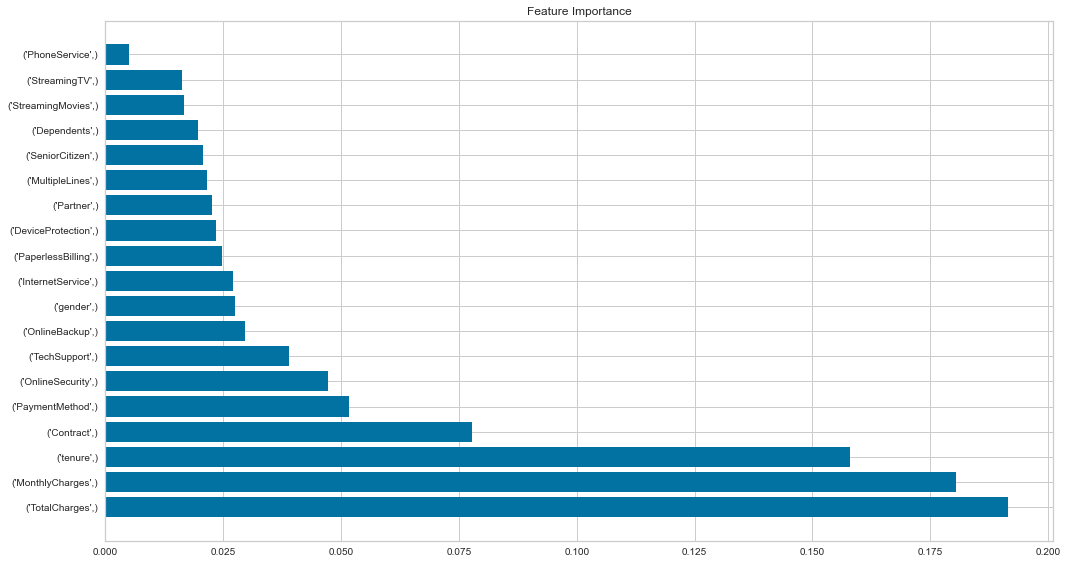

In [1180]:
# Feature Engineering With Random Forest
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=27)
rnd_clf.fit(norm_df.drop(columns='Churn'), norm_df['Churn'])

importances = rnd_clf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(15,8))
plt.title('Feature Importance')
plt.barh(range(norm_df.drop(columns='Churn').shape[1]), importances[sorted_indices], align='center')
plt.yticks(range(norm_df.drop(columns='Churn').shape[1]), norm_df.drop(columns='Churn').columns[sorted_indices])
plt.tight_layout()
plt.show()

Berdasarkan hasil diatas diputuskan untuk tidak menggunakan kolom `PhoneService`, `StreamingTV`, `StreamingMovies`, `Dependents`, `SeniorCitizen`, `MultipleLines`, `Partner`, `PaperlessBilling`, dan `Contract` karena tidak terlalu penting dalam proses prediksi customer `churn`. Pada kolom `DeviceProtection` tetap digunakan karena ada pengaruh langganan fasilitas service oleh customer dengan `churn rate`, untuk kolom Contract tidak digunakan karena memiliki makna yang kurang lebih sama dengan kolom tenure yaitu berkaitan dengan sudah berapa lama customer tersebut menggunakan jasa layanan perusahaan dan tetap stay dan dikarenakan kolom `tenure` memiliki feature importance yang lebih tinggi dari `Contract` maka kolom `tenure` lebih dipilih untuk digunakan

In [1181]:
# Get Used Columns from Feature Engineering
used_col = list(raw_data.drop(columns=['PhoneService', 'StreamingTV', 'StreamingMovies', 'Dependents', 'SeniorCitizen', 'MultipleLines', 'Partner', 'PaperlessBilling', 'Contract']).columns)
cat_col_new = list(raw_data[cat_col].drop(columns=['PhoneService', 'StreamingTV', 'StreamingMovies', 'Dependents', 'SeniorCitizen', 'MultipleLines', 'Partner', 'PaperlessBilling', 'Contract']).columns)

Menyimpan kolom yang digunakan pada variabel `used_col` dan memperbarui daftar kategorikal kolom

## 5.2. Split Data

### 5.2.1. Split Data for Inference

In [1182]:
# Get Data for Model Inference
data_inference = raw_data.sample(5, random_state=27)
data_inference.reset_index(drop=True, inplace=True)
data_inference

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,No,3,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Mailed check,29.20,98.50,No
1,Female,0,No,No,8,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,49.85,365.55,Yes
2,Female,0,Yes,Yes,24,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,Yes,Mailed check,52.50,1208.15,No
3,Female,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.35,295.55,No
4,Male,0,Yes,Yes,19,No,No phone service,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,34.95,610.20,No


Membuat data inferensi untuk mengecek model apakah dapat melakukan prediksi menggunakan data baru. Data inferensi mengambil sejumlah 5 sampel data yang didapatkan secara random dari dataset

In [1183]:
# Remove Inference-Set from Dataset
data_train_test = raw_data[used_col].drop(index=data_inference.index)
data_train_test.reset_index(drop=True, inplace=True)
data_train_test

,gender,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,8,Fiber optic,No,No,Yes,No,Electronic check,99.65,820.50,Yes
1,Male,22,Fiber optic,No,Yes,No,No,Credit card (automatic),89.10,1949.40,No
2,Female,10,DSL,Yes,No,No,No,Mailed check,29.75,301.90,No
3,Female,28,Fiber optic,No,No,Yes,Yes,Electronic check,104.80,3046.05,Yes
4,Male,62,DSL,Yes,Yes,No,No,Bank transfer (automatic),56.15,3487.95,No
...,...,...,...,...,...,...,...,...,...,...,...
7022,Male,24,DSL,Yes,No,Yes,Yes,Mailed check,84.80,1990.50,No
7023,Female,72,Fiber optic,No,Yes,Yes,No,Credit card (automatic),103.20,7362.90,No
7024,Female,11,DSL,Yes,No,No,No,Electronic check,29.60,346.45,No
7025,Male,4,Fiber optic,No,No,No,No,Mailed check,74.40,306.60,Yes


Menghapus data Inference dari data yang akan digunakan untuk proses modeling

### 5.2.2. Split Data and Target

In [1184]:
# Split Data and Target
X = data_train_test.drop(columns='Churn')
y = data_train_test['Churn']

In [1185]:
X

,gender,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,8,Fiber optic,No,No,Yes,No,Electronic check,99.65,820.50
1,Male,22,Fiber optic,No,Yes,No,No,Credit card (automatic),89.10,1949.40
2,Female,10,DSL,Yes,No,No,No,Mailed check,29.75,301.90
3,Female,28,Fiber optic,No,No,Yes,Yes,Electronic check,104.80,3046.05
4,Male,62,DSL,Yes,Yes,No,No,Bank transfer (automatic),56.15,3487.95
...,...,...,...,...,...,...,...,...,...,...
7022,Male,24,DSL,Yes,No,Yes,Yes,Mailed check,84.80,1990.50
7023,Female,72,Fiber optic,No,Yes,Yes,No,Credit card (automatic),103.20,7362.90
7024,Female,11,DSL,Yes,No,No,No,Electronic check,29.60,346.45
7025,Male,4,Fiber optic,No,No,No,No,Mailed check,74.40,306.60


Memisahkan antara data dan target prediksi

In [1186]:
# Balancing data
X_resampled, y_resampled = SMOTENC(categorical_features=[0,2,3,4,5,6,7],sampling_strategy='minority', random_state=27).fit_resample(X, y)
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled.value_counts()

Yes    5160
No     5160
Name: Churn, dtype: int64

Melakukan balancing terhadap kolom target menggunakan `SMOTENC` karena terdapat kategorikal kolom pada data

### 5.2.3. Split Data For Train, Test, and  Validation Set

In [1187]:
# Split Data for  Train+Validation Set and Test-Set
x_trainval, x_test,  y_trainval, y_test = train_test_split(X_resampled, y_resampled,test_size=0.2, random_state=27)

# Split Data for  Train-Set and Validation-Set
x_train, x_val, y_train, y_val = train_test_split(x_trainval, y_trainval, test_size=0.2, random_state=27)

# Check Train, Test, Validation Set Shape
print("Train-Set shape      :",x_train.shape)
print("Test-Set shape       :",x_test.shape)
print("Validation-Set shape :",x_val.shape)

Train-Set shape      : (6604, 10)
Test-Set shape       : (2064, 10)
Validation-Set shape : (1652, 10)


Setelah melakukan pemisahan data didapatkan `6604` data pada Train-Set, `2064` data pada Test-Set, dan `1652` data pada Validation-Set

## 5.3. Missing Value Handling

In [1188]:
# Check Missing Values on Data
raw_data[used_col].isna().sum()

gender              0
tenure              0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [1189]:
# Check Missing Values On Category Columns
for col in cat_col_new:
    print(f'Unique Values on {col} is {list(raw_data[col].unique())}')

Unique Values on gender is ['Female', 'Male']
Unique Values on InternetService is ['DSL', 'Fiber optic', 'No']
Unique Values on OnlineSecurity is ['No', 'Yes', 'No internet service']
Unique Values on OnlineBackup is ['Yes', 'No', 'No internet service']
Unique Values on DeviceProtection is ['No', 'Yes', 'No internet service']
Unique Values on TechSupport is ['No', 'Yes', 'No internet service']
Unique Values on PaymentMethod is ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Unique Values on Churn is ['No', 'Yes']


Berdasarkan hasil diatas dapat disimpulkan bahwa tidak ada missing values pada data

## 5.4. Outlier Handling


Column tenure (Skewness 0.24)


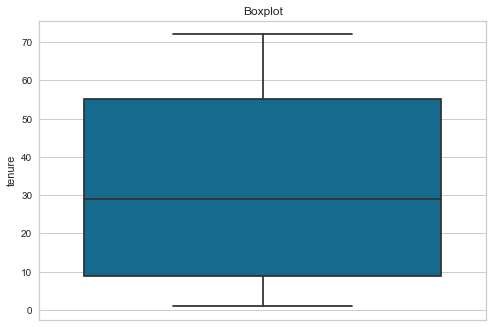


Column MonthlyCharges (Skewness -0.22)


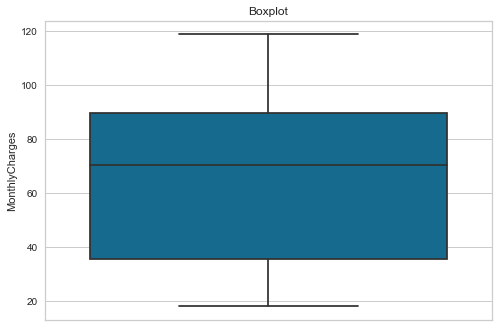


Column TotalCharges (Skewness 0.96)


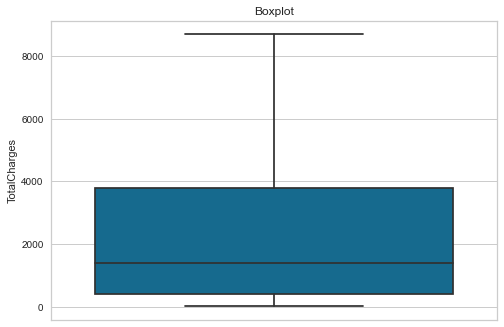

In [1190]:
# Check Data Distribution and Check Data Outlier from Numerical Columns
for col in num_col:
    print(f'\nColumn {col} (Skewness {round(raw_data[col].skew(),2)})')
    sns.boxplot(y=raw_data[col])
    plt.title('Boxplot')
    plt.show()

Berdasarkan hasil diatas dapat diketahui bahwa tidak terdapat outlier pada kolom numerikal

In [1191]:
dataset = tf.data.Dataset.from_tensor_slices(dict(raw_data[used_col]))

## 5.5. Create Pipeline for Scaled and Encoded Columns

In [1192]:
# Scaled Numerical Column and Encoded Categorical Column for Feature Importance
preparation = ColumnTransformer([
              ('numeric', scaler, num_col),
              ('categoric', encoder, cat_col_new)])

# Fit Pipeline with Train-Set
train_set = x_train
train_set['Churn'] = y_train
preparation.fit(train_set)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('categoric',
                                 Pipeline(steps=[('encoder',
                                                  OrdinalEncoder())]),
                                 ['gender', 'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'PaymentMethod', 'Churn'])])

Membuat pipeline untuk melakukan scaling dan encoding serta melakukan fit dengan Train-Set

# 6. Model Definition

In [1193]:
# Create Function for Make Dataset With Pipeline
def get_batches(data, target, buffer_size, batch_size, shuffle=False):
    # Scaled and Encoded Data
    data_norm = data
    data_norm['Churn'] = target
    data_norm = pd.DataFrame(preparation.transform(data_norm), columns=[num_col+cat_col_new])

    #Building a pipeline from a data that exists in memory
    dataset = tf.data.Dataset.from_tensor_slices((data_norm.drop(columns='Churn'), data_norm.Churn))
    
    if shuffle:
        # if we want to shuffle the dataset given a buffer size
        shuffled_data = dataset.shuffle(buffer_size)
        data_batches = shuffled_data.batch(batch_size).prefetch(1)
        
    else: 
        data_batches = dataset.batch(batch_size).prefetch(1)
    
    return data_batches

In [1194]:
# Get Train, Test, Validation Set with Tensorflow Pipelines
training_set = get_batches(x_train, y_train, 512, 128, shuffle=True)
testing_set = get_batches(x_test, y_test, 128, 128, shuffle=False)
validation_set = get_batches(x_val, y_val, 128, 128, shuffle=False)

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Melakukan penyiapan data Train, Test, dan Validation Set sebelum melakukan modeling

In [1195]:
np.random.seed(27)
tf.random.set_seed(27)

# Sequential Model with Default Parameter and 1 Hidden Layer
tf.keras.backend.clear_session()
model_def = tf.keras.models.Sequential()
model_def.add(tf.keras.layers.Dense(64,input_shape=[len(X.columns)]))
model_def.add(tf.keras.layers.Dense(32))
model_def.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_def.compile(loss='mse',metrics='accuracy',
              optimizer=tf.keras.optimizers.SGD())

model_def.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [1196]:
# Functional Model with Tuned Parameter and 2 Hidden Layer
tf.keras.backend.clear_session()
input_tuned = tf.keras.Input(shape=(len(X.columns),))
input_tuned1 = tf.keras.layers.Dense(64,input_shape=[len(X.columns)],kernel_initializer=tf.keras.initializers.glorot_uniform(seed=27), activation='tanh')(input_tuned)
hidden_tuned_1 = tf.keras.layers.Dense(32, kernel_regularizer=tf.keras.regularizers.L2())(input_tuned)
hidden_tuned_1 = tf.keras.layers.BatchNormalization()(hidden_tuned_1)
hidden_tuned_1 = tf.keras.layers.Activation('tanh')(hidden_tuned_1)
hidden_tuned_1 = tf.keras.layers.Dropout(rate=0.2)(hidden_tuned_1)
hidden_tuned_2 = tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.L2())(hidden_tuned_1)
hidden_tuned_2 = tf.keras.layers.BatchNormalization()(hidden_tuned_2)
hidden_tuned_2 = tf.keras.layers.Activation('tanh')(hidden_tuned_2)
hidden_tuned_2 = tf.keras.layers.Dropout(rate=0.2)(hidden_tuned_2)
output_tuned = tf.keras.layers.Dense(1, activation='sigmoid')(hidden_tuned_2)

model_tuned = tf.keras.models.Model(inputs=input_tuned, outputs=output_tuned)
model_tuned.compile(loss='mse', metrics='accuracy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01))

model_tuned.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_1 (Dense)             (None, 32)                352       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                             

Melakukan deklarasi model dimana model pertama menggunakan sequential dengan default parameter, sedangkan model kedua menggunakan functional API dan melakukan parameter tuning 

# 7. Model Training

In [1197]:
%%time
# Train The Model With Default Parameters
history_def = model_def.fit(training_set, epochs=100, validation_data=(validation_set),verbose=1)

Epoch 1/100
52/52 [==============================] - 0s 4ms/step - loss: 0.2024 - accuracy: 0.7025 - val_loss: 0.1825 - val_accuracy: 0.7452
Epoch 2/100
52/52 [==============================] - 0s 3ms/step - loss: 0.1717 - accuracy: 0.7654 - val_loss: 0.1690 - val_accuracy: 0.7676
Epoch 3/100
52/52 [==============================] - 0s 3ms/step - loss: 0.1628 - accuracy: 0.7738 - val_loss: 0.1635 - val_accuracy: 0.7742
Epoch 4/100
52/52 [==============================] - 0s 3ms/step - loss: 0.1585 - accuracy: 0.7794 - val_loss: 0.1607 - val_accuracy: 0.7797
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.7795 - val_loss: 0.1590 - val_accuracy: 0.7821
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.1544 - accuracy: 0.7821 - val_loss: 0.1580 - val_accuracy: 0.7839
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.1533 - accuracy: 0.7832 - val_loss: 0.1573 - val_accuracy: 0.7827
Epoch 8/100
5

In [1198]:
%%time
# Train The Model With Default Parameters
history_tuned = model_tuned.fit(training_set, epochs=100, validation_data=(validation_set), callbacks=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5),verbose=1)

Epoch 1/100
52/52 [==============================] - 1s 6ms/step - loss: 0.6935 - accuracy: 0.4258 - val_loss: 0.6364 - val_accuracy: 0.4310
Epoch 2/100
52/52 [==============================] - 0s 4ms/step - loss: 0.6083 - accuracy: 0.6048 - val_loss: 0.5731 - val_accuracy: 0.7113
Epoch 3/100
52/52 [==============================] - 0s 4ms/step - loss: 0.5711 - accuracy: 0.6763 - val_loss: 0.5396 - val_accuracy: 0.7458
Epoch 4/100
52/52 [==============================] - 0s 4ms/step - loss: 0.5483 - accuracy: 0.7117 - val_loss: 0.5206 - val_accuracy: 0.7567
Epoch 5/100
52/52 [==============================] - 0s 4ms/step - loss: 0.5303 - accuracy: 0.7311 - val_loss: 0.5077 - val_accuracy: 0.7645
Epoch 6/100
52/52 [==============================] - 0s 3ms/step - loss: 0.5182 - accuracy: 0.7406 - val_loss: 0.4976 - val_accuracy: 0.7657
Epoch 7/100
52/52 [==============================] - 0s 4ms/step - loss: 0.5083 - accuracy: 0.7455 - val_loss: 0.4890 - val_accuracy: 0.7694
Epoch 8/100
5

Melakukan pelatihan model menggunakan Train-Set dan Validation-Set

# 8. Model Evaluation

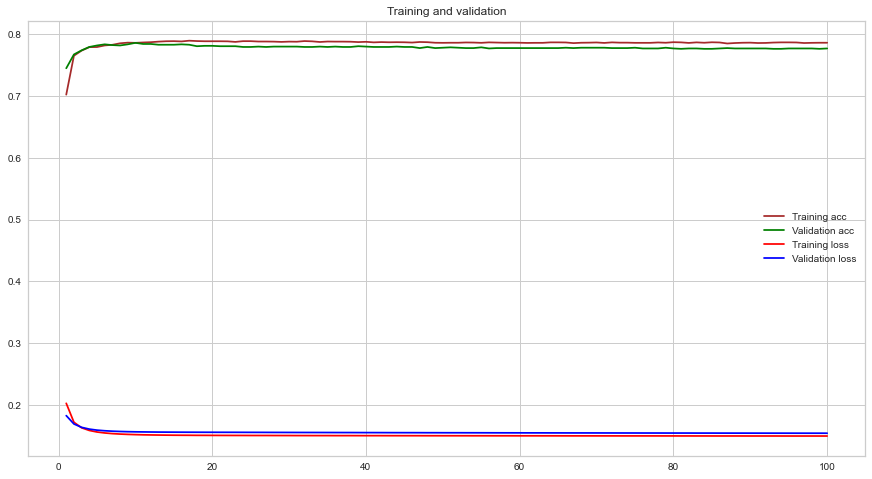

In [1199]:
# Visualize accuracy and loss for train and validation data

acc = history_def.history['accuracy']
val_acc = history_def.history['val_accuracy']
loss = history_def.history['loss']
val_loss = history_def.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=[15,8])
plt.title('Training and validation')
plt.plot(epochs, acc, 'brown', label='Training acc')
plt.plot(epochs, val_acc, 'green', label='Validation acc')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()
plt.show()

In [1200]:
model_def.evaluate(testing_set)

17/17 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.7713


[0.15699608623981476, 0.7713178396224976]

Berdasarkan hasil diatas dapat diketahui bahwa terjadi sebuah masalah gradien, yaitu vanishing gradien dimana tidak ada perubahan bobot pada jumlah epoch diatas 10 hal ini disebabkan karena tidak adanya fungsi aktivasi serta weight init pada model, namun model ini memiliki tingkat akurasi yang cukup baik dengan nilai lossnya yang rendah serta memberikan model yang tidak under dan over fit

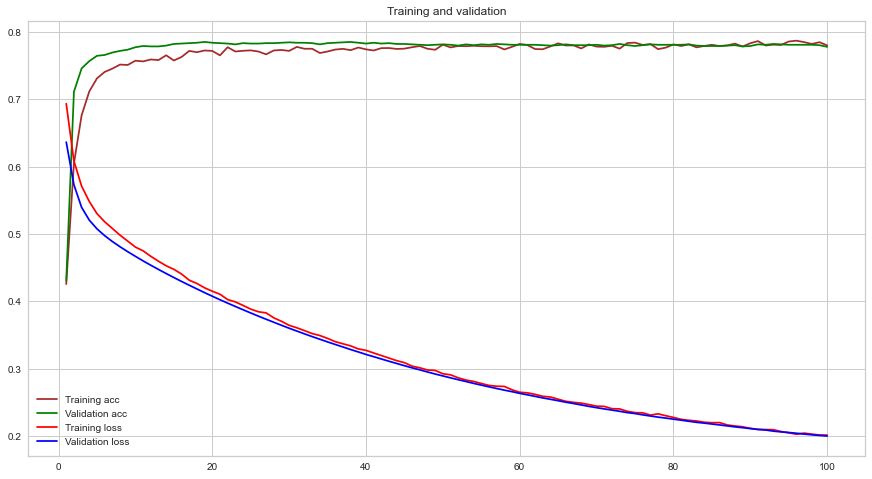

In [1201]:
# Visualize accuracy and loss for train and validation data

acc = history_tuned.history['accuracy']
val_acc = history_tuned.history['val_accuracy']
loss = history_tuned.history['loss']
val_loss = history_tuned.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=[15,8])
plt.title('Training and validation')
plt.plot(epochs, acc, 'brown', label='Training acc')
plt.plot(epochs, val_acc, 'green', label='Validation acc')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()
plt.show()

In [1202]:
model_tuned.evaluate(testing_set)

17/17 [==============================] - 0s 2ms/step - loss: 0.2020 - accuracy: 0.7752


[0.2020137906074524, 0.7751938104629517]

Berdasarkan hasil diatas dapat diketahui bahwa setelah melakukan parameter tuning dalam penambahan fungsi aktifasi, weight init, dan melakukan batch normalization permasalahan vanishing gradien dapat diatasi. Dengan semakin banyaknya jumlah epoch semakin turun juga nilai loss namun nilai akurasi tetap stabil pada kisaran `0.78` (perkiraan berdasarkan grafik). Sehingga diputuskan untuk menggunakan model yang sudah di tuning ini untuk digunakan pada sebuah aplikasi prediksi customer churn

In [1203]:
# Create Function for Normalize Data
def norm(data, target):
    normalize = data
    normalize['Churn'] = target
    normalize = pd.DataFrame(preparation.transform(normalize), columns=[num_col+cat_col_new])
    normalize = normalize.drop(columns='Churn')
    return normalize

# Create Function to Make Prediction List
def pred(data):
    predict = list(model_tuned.predict(data).flat)
    for idx in range(len(predict)):
        if predict[idx]>=0.5:
            predict[idx]='Yes'
        else:
            predict[idx]='No'
    return predict

In [1204]:
# Normalize X_train and X_test
X_train_norm = norm(x_train,y_train)
X_test_norm = norm(x_test,y_test)

# Predict X_train and X_test
y_train_pred = pred(X_train_norm)
y_test_pred = pred(X_test_norm)

 31/207 [===>..........................] - ETA: 0s 

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


65/65 [==============================] - 0s 1ms/step


In [1205]:
# Display Classification Report Train-Set and Test-Set from NN Model
print('Classification Report Train-Set:')
print(classification_report(y_train,y_train_pred))
print('Classification Report Test-Set:')
print(classification_report(y_test,y_test_pred))

Classification Report Train-Set:
              precision    recall  f1-score   support

          No       0.79      0.79      0.79      3329
         Yes       0.79      0.79      0.79      3275

    accuracy                           0.79      6604
   macro avg       0.79      0.79      0.79      6604
weighted avg       0.79      0.79      0.79      6604

Classification Report Test-Set:
              precision    recall  f1-score   support

          No       0.77      0.77      0.77      1007
         Yes       0.78      0.78      0.78      1057

    accuracy                           0.78      2064
   macro avg       0.78      0.77      0.78      2064
weighted avg       0.78      0.78      0.78      2064



Berdasarkan hasil Classification Report dapat diketahui bahwa model memberikan performa prediksi yang cukup dan model merupakan `good fit`

# 9. Model Saving

In [1206]:
# Save Model, Data Preparation Pipeline, List Used Columns, Numerical Columns, and Categorical Columns on Folder deployment
raw_data.to_csv('WA_Fn-UseC_-Telco-Customer-Churn_new.csv')
model = model_tuned.save("deployment/ann_model.h5")
joblib.dump(preparation, "deployment/data_preparation.pkl")
with open('deployment/list_used_columns.txt', 'w') as used:
  used.write(str(used_col))
with open('deployment/list_num_columns.txt', 'w') as num:
  num.write(str(num_col))
with open('deployment/list_cat_columns.txt', 'w') as cat:
  cat.write(str(cat_col_new))

Melakukan penyimpanan model, pipeline persiapan data, list kolom yang digunakan pada feature engineering, serta numerikal dan kategorikal kolom agar dapat digunakan pada aplikasi

# 10.Model Inference

## 10.1. Inferencing

In [1207]:
# Display `data_inference` with Used Columns
data_inference[used_col]

,gender,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,3,DSL,No,Yes,No,No,Mailed check,29.20,98.50,No
1,Female,8,DSL,Yes,No,No,No,Electronic check,49.85,365.55,Yes
2,Female,24,DSL,Yes,Yes,Yes,Yes,Mailed check,52.50,1208.15,No
3,Female,16,No,No internet service,No internet service,No internet service,No internet service,Credit card (automatic),19.35,295.55,No
4,Male,19,DSL,Yes,Yes,No,No,Mailed check,34.95,610.20,No


In [1208]:
# Normalization Inference Data with Pipeline
inf_norm = pd.DataFrame(preparation.transform(data_inference), columns=[num_col+cat_col_new])
inf_norm = np.array(inf_norm.drop(columns='Churn'))
result = model_tuned.predict(inf_norm)

1/1 [==============================] - 0s 55ms/step


c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [1209]:
# Display `data_inference` with Used Columns and Predicted Result
data_inference_final = data_inference[used_col].copy()
result_list = []
for val in list(result.flat):
    if val > 0.5:
        result_list.append('Yes')
    else:
        result_list.append('No')
data_inference_final['Predict'] = result_list
data_inference_final

,gender,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Predict
0,Female,3,DSL,No,Yes,No,No,Mailed check,29.20,98.50,No,Yes
1,Female,8,DSL,Yes,No,No,No,Electronic check,49.85,365.55,Yes,No
2,Female,24,DSL,Yes,Yes,Yes,Yes,Mailed check,52.50,1208.15,No,No
3,Female,16,No,No internet service,No internet service,No internet service,No internet service,Credit card (automatic),19.35,295.55,No,No
4,Male,19,DSL,Yes,Yes,No,No,Mailed check,34.95,610.20,No,No


Berdasarkan hasil prediksi diatas menggunakan data baru, dapat disimpulkan bahwa masih terjadinya sebuah miss classification, namun model dapat mengeluarkan hasil prediksi

# 10. Pengambilan Kesimpulan

Berdasarkan EDA:
- Rata-rata waktu customer stay pada penyedia layanan tersebut adalah selama `32` bulan atau `2` tahun lebih `1` bulan, berdasarkan hal ini dapat diasumsikan bahwa customer `churn rate` cukup rendah karena rata-rata dari keseluruhan customer cukup loyal untuk waktu yang lama
- Customer cenderung loyal, karena memiliki churn rate yang terbilang cukup rendah
- Semakin lama tenure maka semakin menurun juga tingkat churn seorang customer, customer churn terbanyak terdapat pada customer yang baru berlangganan dibawah setengah tahun
- Tenure tercepat seorang customer adalah 1 bulan dimana besar kemungkinan bahwa customer tersebut baru saja berlangganan, sedangkan tenure terlama seorang customer adalah `72` bulan
- Terdapat informasi menarik dari customer yang telah berlangganan selama 72 bulan, dimana customer tersebut sudah menikah namun hanya tinggal berdua saja dan customer tersebut berlangganan pada seluruh fasilitas tambahan yang ada dengan pembayaran melalui credit card secara otomatis, sehingga dapat diasumsikan bahwa customer tersebut merupakan seorang dengan penghasilan yang cukup tinggi
- Customer akan cenderung churn ketika memilih untuk tidak berlangganan dalam beberapa fasilitas tambahan yang diberikan seperti Online Security, Online Backup, Device Protection, dan Tech Support. Dapat diasumsikan bahwa terdapat biaya tambahan apabila customer ingin berlangganan pada fasilitas tambahan sehingga beberapa customer akan churn karena perlu biaya yang lebih banyak apabila ingin mendapatkan fasilitas tersebut dan mungkin penyedia jasa layanan lainnya tidak memberlakukan biaya tambahan apabila customer ingin menikmati fasilitas tersebut
- Demografi seorang customer tidak terlalu mempengaruhi churn rate
- Customer masih banyak yang melakukan pembayaran secara manual daripada otomatis dan dapat diasumsikan bahwa customer yang melakukan pembayaran secara otomatis merupakan customer yang sudah mapan secara ekonomi

Berdasarkan Data Preprocessing:
- Diputuskan untuk tidak menggunakan kolom `PhoneService`, `StreamingTV`, `StreamingMovies`, `Dependents`, `SeniorCitizen`, `MultipleLines`, `Partner`, `PaperlessBilling`, dan `Contract` karena tidak terlalu penting dalam proses prediksi customer `churn` berdasarkan feature importance dengan random forest. Pada kolom `DeviceProtection` tetap digunakan karena ada pengaruh langganan fasilitas service oleh customer dengan `churn rate`, untuk kolom Contract tidak digunakan karena memiliki makna yang kurang lebih sama dengan kolom tenure yaitu berkaitan dengan sudah berapa lama customer tersebut menggunakan jasa layanan perusahaan dan tetap stay dan dikarenakan kolom `tenure` memiliki feature importance yang lebih tinggi dari `Contract` maka kolom `tenure` lebih dipilih untuk digunakan
- Terdapat beberapa missing values berupa empty string pada kolom TotalCharges dimana sebelumnya kolom tersebut bertipe data Object
- Tidak ada outlier namun data target imbalance sehingga perlu melakukan balancing data menggunakan SMOTENC


Kesimpulan berdasarkan Model yang dibangun:
- Terjadi sebuah masalah gradien pada model dengan default parameter, yaitu vanishing gradien dimana tidak ada perubahan bobot pada jumlah epoch diatas 10 hal ini disebabkan karena tidak adanya fungsi aktivasi serta weight init pada model, namun model ini memiliki tingkat akurasi yang cukup baik dengan nilai lossnya yang rendah serta memberikan model yang tidak under dan over fit
- Setelah melakukan parameter tuning dalam penambahan fungsi aktifasi, weight init, dan melakukan batch normalization permasalahan vanishing gradien dapat diatasi. Dengan semakin banyaknya jumlah epoch semakin turun juga nilai loss namun nilai akurasi tetap stabil pada kisaran `0.78` (perkiraan berdasarkan grafik). Sehingga diputuskan untuk menggunakan model yang sudah di tuning ini untuk digunakan pada sebuah aplikasi prediksi customer churn

Beberapa alasan yang mungkin menjadi penyebab model yang dibangun perlu dikembangkan lagi untuk diimplementasikan:
- Kurang tepat dalam emlakukan feature engineering
- Masih perlunya eksplorasi mengenai kombinasi dari parameter yang digunakan

Saran:
- Membaca jurnal atau melakukan wawancara terhadap perusahaan penyedia layanan telekomunikasi untuk mendapatkan feature mana yang benar-benar penting dan benar-benar dibutuhkan dalam proses prediksi
- Melakukan parameter tunging menggunakan GridSearch atau Randomizer